# Discussion 2

### Pandas

Here we will discuss the nitty gritty of how to use pandas with a dataset, all the different ways you can manipulate, clean, arrange and draw metrics from your dataset.

First, The most commonly used function(s) for loading databases into pandas are the read_(filetype) functions. For example, to read a csv file, we use pd.read_csv()

In [1]:
import pandas as pd

dataframe = pd.read_csv('diabetes.csv')

dataframe.head()

/var/folders/tw/z4yw5g4n36lc48tnljks10680000gn/T/ipykernel_54901/4229771571.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As we can see above, read_csv() reads the csv file and creates a dataframe that displays our dataset.

Once we have loaded the dataset, we can do a variety of things with it.

If we want to reference any one of the columns specifically, do this:

In [3]:
dataframe['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [4]:
dataframe.Pregnancies

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

To select rows in dataframes, we can index the dataframes specifically in order to select certain rows. This indexing is done with dataframe.iloc[] or dataframe.loc[]

In [24]:
print(f'To select only 1 row, use just the index of selection: \n{dataframe.iloc[1]}')

To select only 1 row, use just the index of selection: 
Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64


dataframe.loc[] and dataframe.iloc[] both accept input as:

`dataframe.loc[row, column(string)]`
and
`dataframe.iloc[row, column(int)]`

The main difference is that dataframe.loc[] can accept the column name (in string) whereas dataframe.iloc[] can take numerical inputs or slices as column inputs

In [35]:
dataframe.iloc[1, 0:3]

Pregnancies       1.0
Glucose          85.0
BloodPressure    66.0
Name: 1, dtype: float64

Many times there will be cases when your loaded data is missing some data, and then these empty spots will be represented as 'na'

There are 2 alternatives of what you can do with these 'na' values:

1. You can drop the rows/columns that have them with dataframe.dropna(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
2. You can fill out the missing values with 'None' or some specific value (like 0) using dataframe.fillna(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

To add or delete rows and columns, we can use dataframe.drop(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In order to rename existing columns, we just use dataframe.rename(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

Pandas is also a very strong framework because it provides us tools to calculate statistics for each column separately

In [37]:
# Basics:

print(dataframe.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [39]:
print(f'Pregnancies mean: {dataframe.Pregnancies.mean()}, median: {dataframe.Pregnancies.median(),}, std: {dataframe.Pregnancies.std()}')

Pregnancies mean: 3.8450520833333335, median: (3.0,), std: 3.3695780626988694


We can also use dataframe.groupby('column_to_group_by') or dataframe.groupby(['column1', 'column2']) for grouping multiple columns (features) together 

In [40]:
grouped = dataframe.groupby('Pregnancies')
print(grouped.mean())

                Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
Pregnancies                                                                    
0            123.000000      67.153153      22.270270   81.675676  34.290090   
1            112.748148      67.792593      24.437037   98.674074  31.372593   
2            110.796117      63.252427      21.601942   85.844660  30.583495   
3            123.586667      66.586667      20.080000   87.453333  30.425333   
4            125.117647      70.029412      15.882353   69.441176  32.141176   
5            118.859649      76.210526      17.385965   57.298246  33.192982   
6            120.800000      68.420000      17.640000   63.580000  30.290000   
7            136.444444      70.777778      20.288889   84.466667  32.631111   
8            131.736842      75.184211      17.315789   92.815789  31.568421   
9            131.392857      77.892857      20.892857   62.428571  31.707143   
10           120.916667      70.208333  

In [41]:
grouped = dataframe.groupby(['Pregnancies', 'Glucose'])
print(grouped.mean())

                     BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies Glucose                                                
0           57                60.0            0.0      0.0  21.7   
            67                76.0            0.0      0.0  45.3   
            73                 0.0            0.0      0.0  21.1   
            74                52.0           10.0     36.0  27.8   
            78                88.0           29.0     40.0  36.9   
...                            ...            ...      ...   ...   
13          158              114.0            0.0      0.0  42.3   
14          100               78.0           25.0    184.0  36.6   
            175               62.0           30.0      0.0  33.6   
15          136               70.0           32.0    110.0  37.1   
17          163               72.0           41.0    114.0  40.9   

                     DiabetesPedigreeFunction   Age  Outcome  
Pregnancies Glucose                                 

In [43]:
# Sum of values in a column
print('Pregnancies sum: ', dataframe['Pregnancies'].sum())

# Counting the number of entries
print('Pregnancies count: ', dataframe['Pregnancies'].count())

# Apply multiple aggregation functions at once
print(dataframe.groupby('Glucose').agg(['mean', 'sum', 'count']))


Pregnancies sum:  2953
Pregnancies count:  768
        Pregnancies           BloodPressure            SkinThickness       \
               mean sum count          mean  sum count          mean  sum   
Glucose                                                                     
0          2.800000  14     5     67.600000  338     5     29.600000  148   
44         5.000000   5     1     62.000000   62     1      0.000000    0   
56         2.000000   2     1     56.000000   56     1     28.000000   28   
57         4.500000   9     2     70.000000  140     2     18.500000   37   
61         3.000000   3     1     82.000000   82     1     28.000000   28   
...             ...  ..   ...           ...  ...   ...           ...  ...   
195        6.500000  13     2     70.000000  140     2     16.500000   33   
196        5.333333  16     3     80.666667  242     3     21.666667   65   
197        4.000000  16     4     71.000000  284     4     45.750000  183   
198        0.000000   0     1

In [16]:
import numpy as np
import pandas as pd

df = pd.read_csv('Diabetes.csv')

print(df.head())

print(np.asarray(df.Pregnancies).reshape(-1, 1))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
[[ 6]
 [ 1]
 [ 8]
 [ 1]
 [ 0]
 [ 5]
 [ 3]
 [10]
 [ 2]
 [ 8]
 [ 4]
 [10]
 [10]
 [ 1]
 [ 5]
 [ 7]
 [ 0]
 [ 7]
 [ 1]
 [ 1]
 [ 3]
 [ 8]
 [ 7]
 [ 9]
 [11]
 [10]
 [ 7]
 [ 1]
 [13]
 [ 5]
 [ 5]
 [ 3]
 [ 3]
 [ 6]
 [10]
 [ 4]
 [11]
 [ 9]
 [ 2]
 [ 4]
 [ 3]
 [ 7]
 [ 7]
 [ 9]
 [ 7]
 [ 0]
 [ 1]
 [ 2]
 [ 7]
 [ 7]
 [ 

### HW help: Identifying Outliers

#### Boxplot:
A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

Here's a breakdown of a boxplot structure:

The Box: The central box of the plot represents the interquartile range (IQR), which contains the middle 50% of the data
. The bottom and top edges of the box indicate the first quartile (25th percentile) and third quartile (75th percentile), respectivel



The Median: Inside the box, a line (usually a horizontal line) indicates the median (50th percentile) of the data 

t.

The Whiskers: The lines extending from the top and bottom of the box (whiskers) indicate the range of the data (except for potential outl
ers). The length of the whiskers can vary, but they typically extend ttimes the IQR.

IQR.

Outliers: Data points that lie beyond the whiskers are plotted individually and are considered outliers.

In [44]:
from sklearn.datasets import load_wine
import seaborn as sns
df, _ = load_wine(return_X_y=True, as_frame=True) 

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<Axes: xlabel='alcohol'>

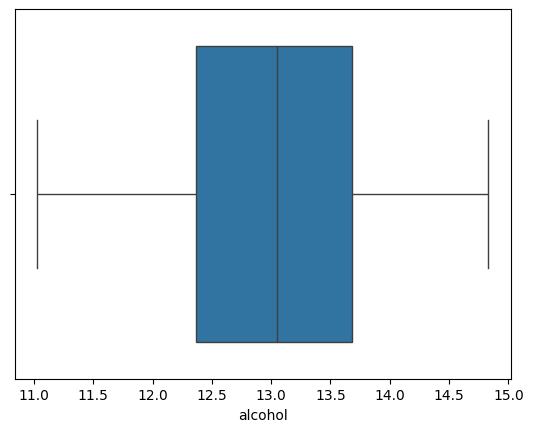

In [45]:
sns.boxplot(x = df.alcohol)

### Anomaly Detection:

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called anomalies. It has various applications in a range of industries such as fraud detection, network security, fault detection, system health monitoring, event detection in sensor networks, and detecting ecosystem disturbances. It is similar to – but not entirely the same as – noise removal and outlier detection.

Anomaly detection is applicable in domains where data is generated continuously and there is a need to identify rare events that may have significant impact. The challenge in anomaly detection is to identify rare events that have not been seen before, without a well-defined notion of what is norm

The code provided is an example of anomaly detection using a One-Class SVM (Support Vector Machine). This approach is particularly useful for anomaly detection because it learns a decision function for outlier detection, i.e., it learns regions where the training data is concentrated, ignoring the minority (anomalous) data.al.

[[ 33.6   0. ]
 [ 26.6   0. ]
 [ 23.3   0. ]
 ...
 [ 26.2 112. ]
 [ 30.1   0. ]
 [ 30.4   0. ]]
(155, 2)


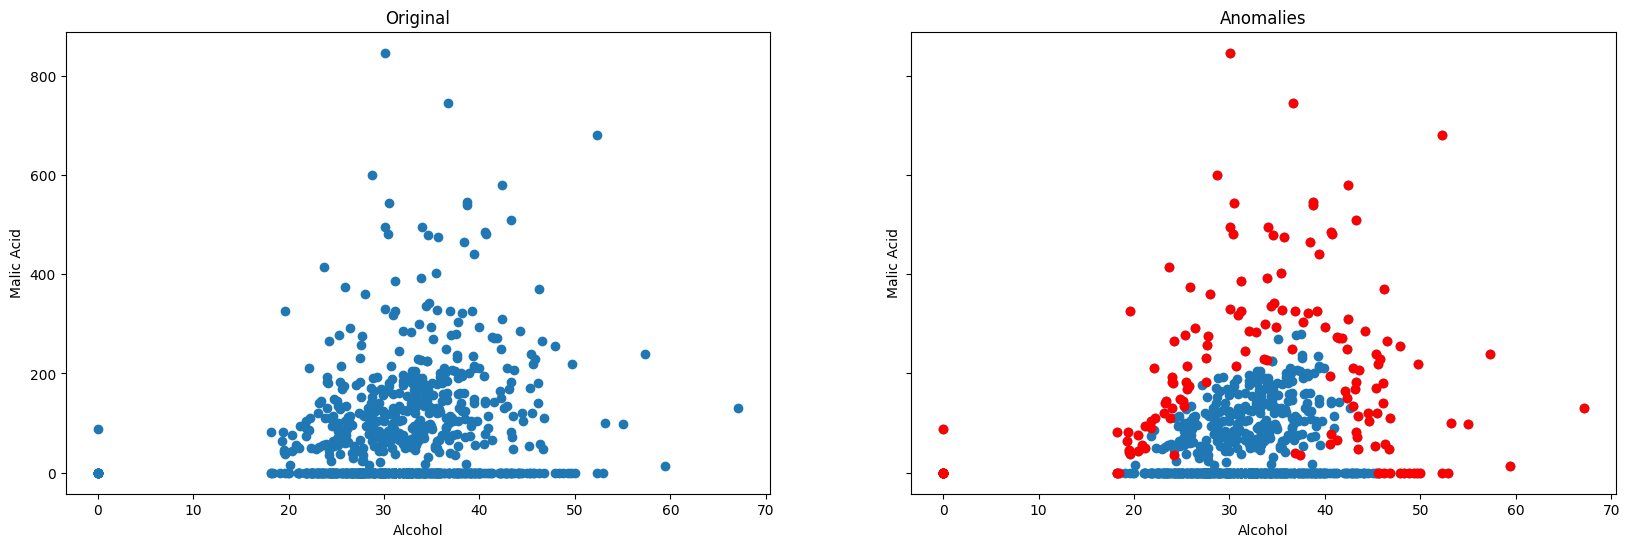

In [12]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from numpy import where


# Load the wine dataset
df = pd.read_csv('diabetes.csv')

# Selecting relevant features: 'alcohol' and 'malic_acid'
# Note: 'alcohol' is at index 0 and 'malic_acid' is at index 1 in the dataset
relevant_features = [
  "BMI",
  "Insulin"
]

relevant_features = df[relevant_features].to_numpy()
print(relevant_features)

# Optionally apply log transformation
# relevant_features = np.log(relevant_features + 0.1)

# Training One-Class SVM with the selected features
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.2)
svm.fit(relevant_features)

# Predicting anomalies
pred = svm.predict(relevant_features)

# Extracting the negative outputs as outliers
anom_index = where(pred == -1)
values = relevant_features[anom_index]

print(values.shape)

# Visualizing the results in a plot
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(20, 6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(relevant_features[:, 0], relevant_features[:, 1])
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Malic Acid')

# Anomalies
ax1.set_title('Anomalies')
ax1.scatter(relevant_features[:, 0], relevant_features[:, 1])
ax1.scatter(values[:, 0], values[:, 1], color='red')  # Highlight anomalies
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')

plt.show()
